## 1.4.1 图像模糊

In [1]:
from PIL import Image
import numpy as np
from scipy.ndimage import filters
import matplotlib.pyplot as plt

In [2]:
im = np.array(Image.open('../../data/empire.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 5)

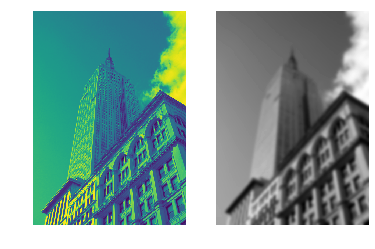

In [3]:
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(im2)
plt.axis('off')
plt.gray()
plt.show()

In [4]:
np.array(Image.open('../../data/empire.jpg'))[:, :, 1].shape

(800, 569)

In [5]:
im = np.array(Image.open('../../data/empire.jpg'))

In [6]:
im2 = np.zeros(im.shape)

In [7]:
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i], 5)
im2 = np.uint8(im2)

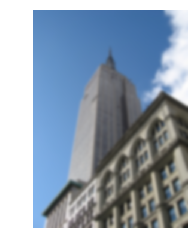

In [8]:
plt.imshow(im2)
plt.axis('off')
plt.show()

## 1.4.2 图像导数

In [9]:
im = np.array(Image.open('../../data/empire.jpg').convert('L'))

In [10]:
# Sobel 导数滤波器
imx = np.zeros(im.shape)
filters.sobel(im, 1, imx)

In [11]:
imy = np.zeros(im.shape)
filters.sobel(im, 0, imy)

In [12]:
magnitude = np.sqrt(imx**2 + imy**2)

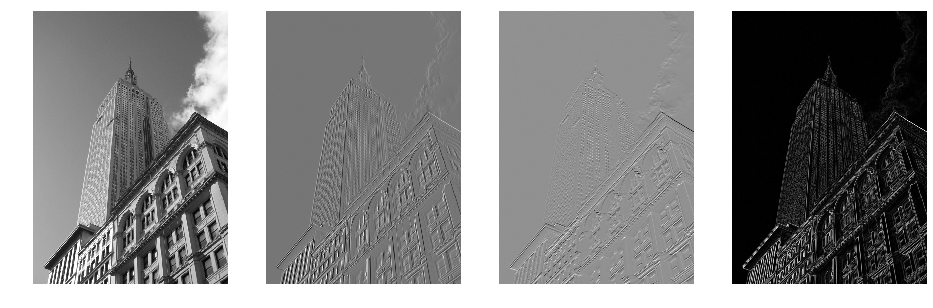

In [13]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax1.imshow(im)
ax1.axis('off')
# ax1.set_title(label='(a)')
ax2.imshow(imx)
ax2.axis('off')
ax3.imshow(imy)
ax3.axis('off')
ax4.imshow(magnitude)
ax4.axis('off')
plt.show()

In [14]:
def gaussion_do(im, sigma):
    """
    sigma: 标准差
    """
    
    imx = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma, sigma), (0, 1), imx)

    imy = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma, sigma), (0, 1), imy)

    magnitude = np.sqrt(imx**2 + imy**2)
    
    return imx, imy, magnitude

def Sobel_do(im):
    # Sobel 导数滤波器
    imx = np.zeros(im.shape)
    filters.sobel(im, 1, imx)
    imy = np.zeros(im.shape)
    filters.sobel(im, 0, imy)
    magnitude = np.sqrt(imx**2 + imy**2)
    return imx, imy, magnitude

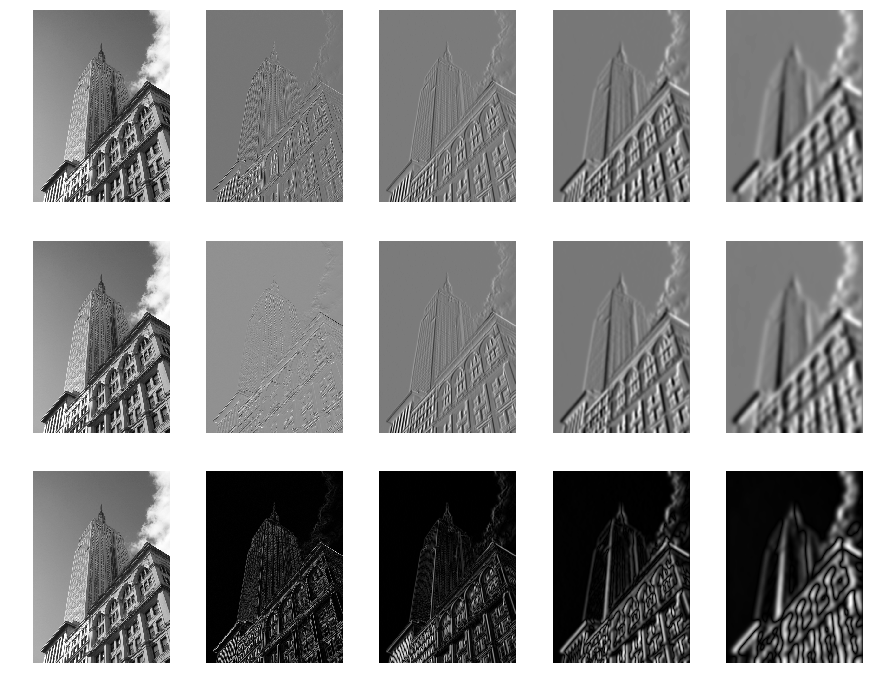

In [15]:
plt.figure(figsize=(15, 12))
for i in (1, 6, 11):
    plt.subplot(3, 5, i)
    plt.imshow(im)
    plt.axis('off')
sobel_im = Sobel_do(im)
for index, i in enumerate([2, 7, 12]):
    plt.subplot(3, 5, i)
    plt.imshow(sobel_im[index])
    plt.axis('off')
gaussion_place = [3, 8, 13]
for sigma in (2, 5, 10):
    gaussion_im = gaussion_do(im, sigma)
    for index, i in enumerate(gaussion_place):
        plt.subplot(3, 5, i)
        plt.imshow(gaussion_im[index])
        plt.axis('off')
    gaussion_place = [i+1 for i in gaussion_place]

## 1.4.3 形态学：对象计数

In [16]:
from scipy.ndimage import measurements, morphology

In [17]:
# 载入图像，然后使用阈值化操作，以保证处理的图像为二值图像
im = np.array(Image.open('../../data/houses.png').convert('L'))

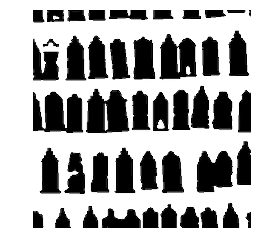

In [18]:
plt.gray()
plt.imshow(im)
plt.axis('off')
plt.show()

In [19]:
im = 1 * (im < 128)

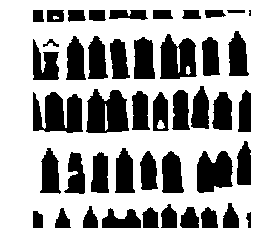

In [20]:
# a
plt.imshow(~im)
plt.axis('off')
plt.show()

In [21]:
labels, nbr_objects = measurements.label(im)
print('Number of objects: {}'.format(nbr_objects))

Number of objects: 45


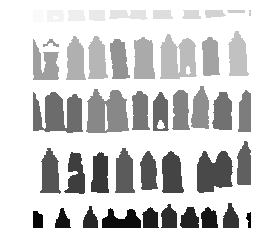

In [22]:
# b
im_b = ~labels.reshape(im.shape)
plt.gray()
plt.imshow(im_b)
plt.axis('off')
plt.show()

In [23]:
# 形态学开操作更好地分离各个对象
im_open = morphology.binary_opening(im, np.ones((9, 5)), iterations=2)

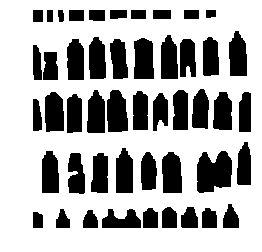

In [24]:
# c
plt.imshow(~im_open)
plt.axis('off')
plt.show()

In [25]:
labels_open, nbr_objects_open = measurements.label(im_open)
print('Number of objects: {}'.format(nbr_objects_open))

Number of objects: 48


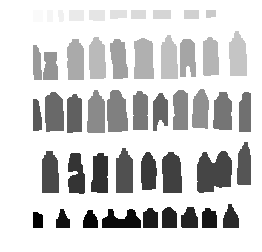

In [26]:
# d
plt.imshow(~labels_open)
plt.axis('off')
plt.show()

## 1.4.4 一些有用的 SciPy 模块

### 1. 读写 .mat文件

In [27]:
import scipy.io

In [28]:
data = scipy.io.loadmat('test.mat')

In [29]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Oct 04 15:18:40 2010',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[233, 233, 233, ..., 171, 170, 173],
        [233, 232, 233, ..., 172, 172, 173],
        [232, 232, 232, ..., 173, 172, 173],
        ...,
        [133, 130, 130, ..., 115, 114, 113],
        [130, 129, 129, ..., 112, 112, 115],
        [130, 130, 130, ..., 112, 113, 113]], dtype=uint8),
 'labels': array([[ 1,  1,  1, ..., 20, 20, 20]], dtype=uint8)}

In [30]:
data_save = {}
data_save['x'] = data['A']
scipy.io.savemat('save.mat', data_save)

### 2. 以图像形式保存数组

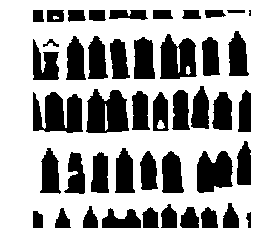

In [33]:
plt.imshow(~im)
plt.axis('off')
plt.show()

In [40]:
from scipy.misc import imsave

In [41]:
imsave('test.jpg', ~im)

/Users/cool/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [43]:
import imageio

In [50]:
imageio.imwrite('test_imageio.jpg', im)

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
